<a href="https://colab.research.google.com/github/torkralle/GAS-Notion-GCal-Todoist-Sync/blob/main/furie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ライブラリのインポート
%matplotlib inline
import sys
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import display, Audio
import scipy.io.wavfile

# ホーミーのフーリエ変換

In [2]:
overtone_path = "/content/drive/MyDrive/Laboratory/Colab/ホーミー1.wav"
overtone_fs, overtone = wavfile.read(overtone_path)
Audio(overtone_path)

In [3]:
# 横軸（時間）の配列を作成　
# np.arange(初項, 等差数列の終点, 等差)
t = np.arange(0, overtone.shape[0]/overtone_fs, 1/overtone_fs)  

overtone = overtone.astype(np.float) / 32768;
length_of_overtone = len(overtone)

定数の定義

データの可視化

length_of_overtone 133056


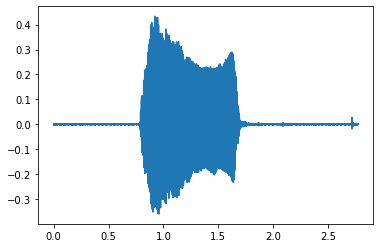

In [4]:
# 配列の長さを表示
print("length_of_overtone", length_of_overtone)

plt.figure()
plt.plot(t, overtone)
plt.savefig('overtone.png')

# 関数の定義

## ハニング窓

In [5]:
def hanning_window(N):
    w = np.zeros(N)
    if N % 2 == 0:
        for n in range(N):
            w[n] = 0.5 - 0.5 * np.cos(2 * np.pi * n / N)
    else:
        for n in range(N):
            w[n] = 0.5 - 0.5 * np.cos(2 * np.pi * (n + 0.5) / N)
    return w

## データの可視化

In [6]:
def plot(t, data, name):
  plt.figure()
  plt.plot(t, data)
  plt.savefig(f'{name}.png')

In [ ]:
def show_freq():

## 音声作成

In [7]:
def create_audio(fs, s_arr, t, name):
  s_arr = s_arr * 1 / (np.max(np.abs(s_arr)))
  scipy.io.wavfile.write(f'out{name}.wav', fs, s_arr)

In [8]:
def band_stop_filter(F_abs, min_freq, max_freq):
  for k in range(fmin, fmax):
    F_abs[k] = 0.00001
    F_abs[dft_size - k] = F_abs[k]
  return F_abs

In [9]:
# def multiple_hanning_window(offset):
  

In [10]:
frame_size = 4096
shift_size = int(frame_size / 2)
number_of_frame = int((length_of_overtone - frame_size) / shift_size)
min = 3
max = 150


x = np.zeros(frame_size)
# s1だったもの
new_audio = np.zeros(length_of_overtone)
w = hanning_window(frame_size)
dft_size = frame_size

fmin = round(min * 100 * dft_size / overtone_fs)  # min * 100 Hz
fmax = round(max * 100 * dft_size / overtone_fs)  # max *  100 Hz

In [13]:
def furie_transform():
  for frame in range(number_of_frame):
    offset = shift_size * frame

    for n in range(frame_size): 
        x[n] = overtone[offset + n] * w[n] 
      
    X = np.fft.fft(x)
    X_abs = np.abs(X)
    X_angle = np.angle(X)
    fft_data = np.abs(np.fft.fft(x))    
    #横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
    freqList = np.fft.fftfreq(x.shape[0], d=1.0/overtone_fs)  
    #データプロット
    plt.plot(freqList, X_abs)
    plt.xlim(0, 8000) #0～8000Hzまで表示
    plt.show()

    plot(t, new_audio, "new")
    create_audio(overtone_fs, new_audio, t, "new")

In [11]:
def furie(min, max):
  for frame in range(number_of_frame):
      offset = shift_size * frame
    
      for n in range(frame_size): 
          x[n] = overtone[offset + n] * w[n] 
        
      X = np.fft.fft(x)
      X_abs = np.abs(X)
      X_angle = np.angle(X)      

      X_abs = band_stop_filter(X_abs, fmin, fmax)

      
      Y = X_abs * np.exp(1j * X_angle)
      y = np.fft.ifft(Y)
      y = np.real(y)
      
      for n in range(frame_size):
          new_audio[offset + n] += y[n]

  plot(t, new_audio, "new")
  create_audio(overtone_fs, new_audio, t, "new")

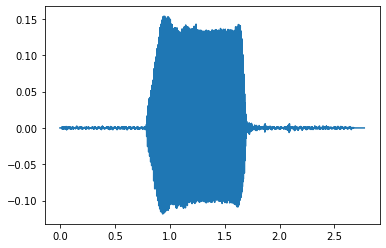

In [12]:
furie(3, 150)

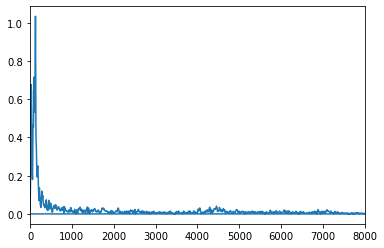

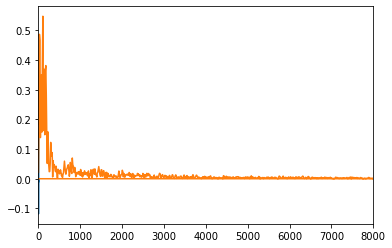

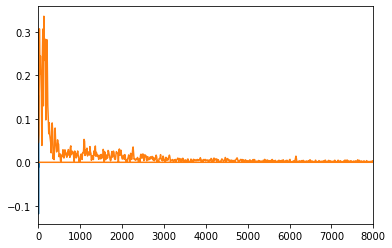

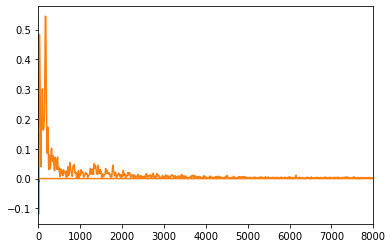

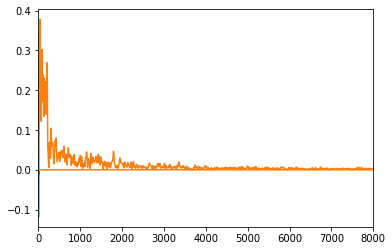

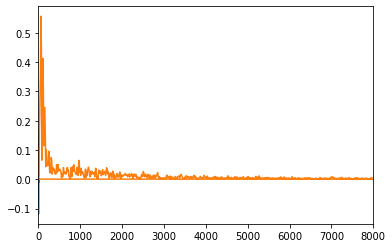

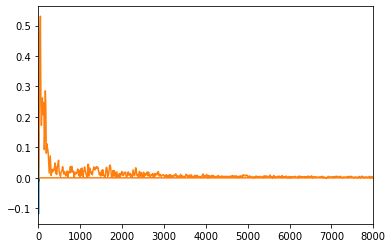

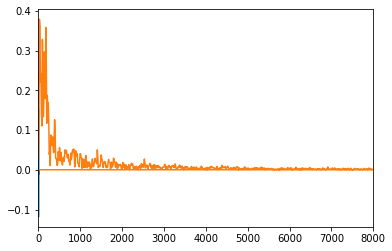

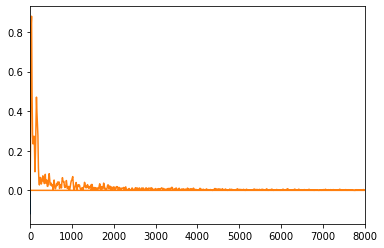

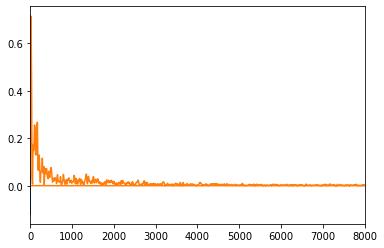

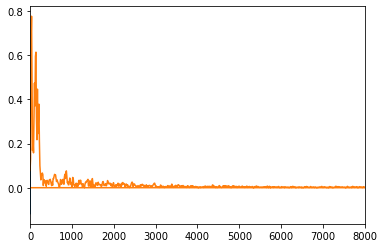

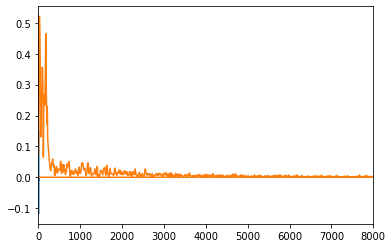

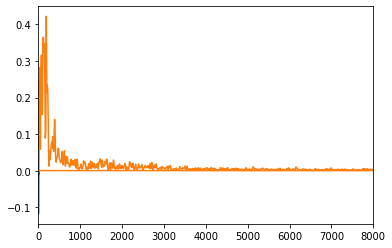

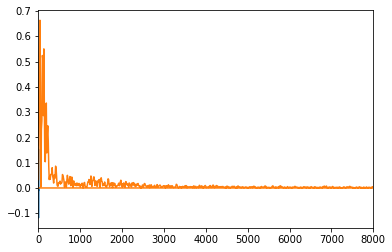

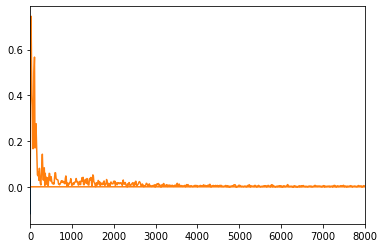

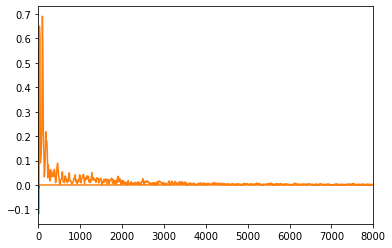

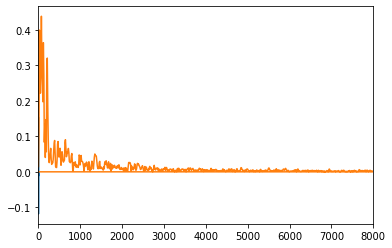

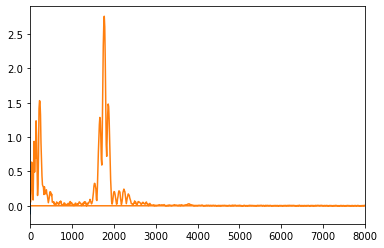

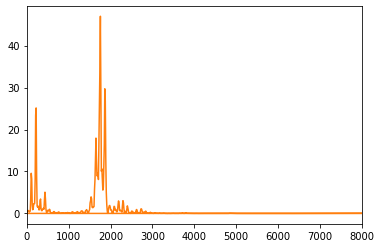

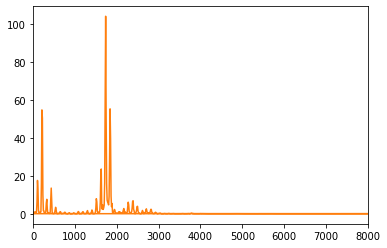

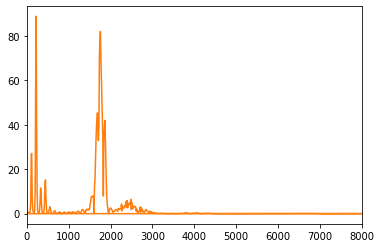

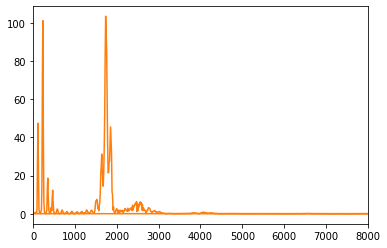

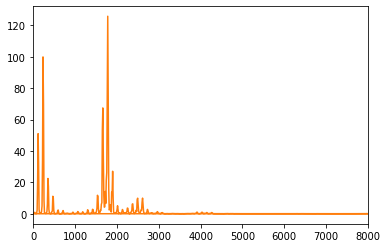

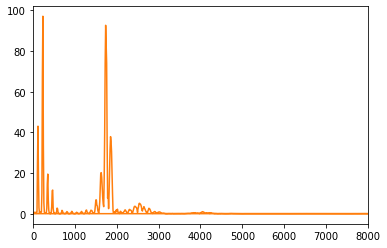

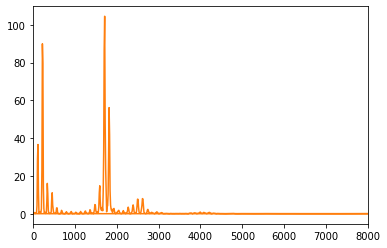

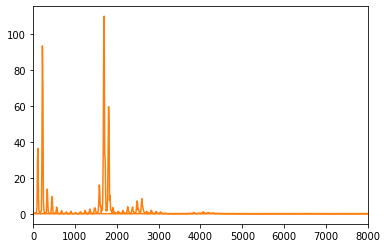

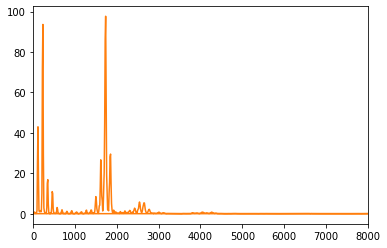

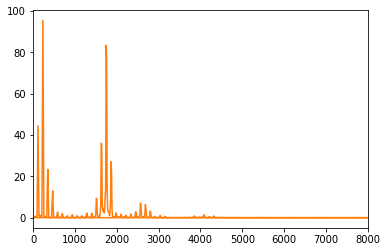

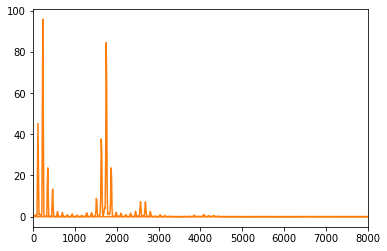

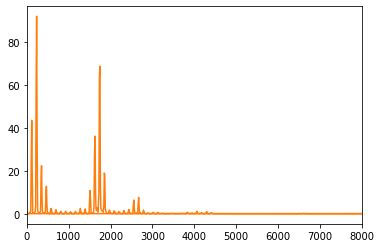

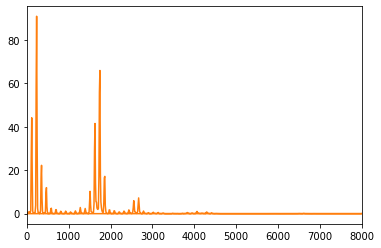

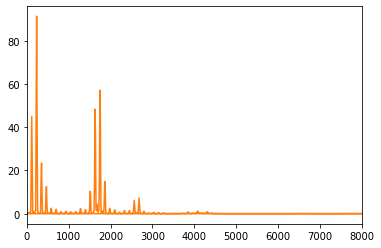

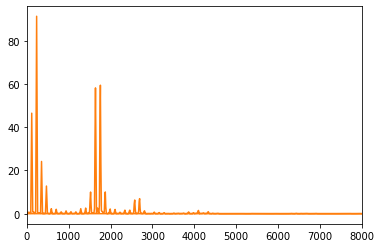

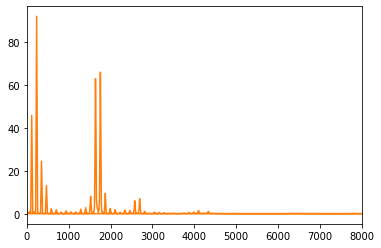

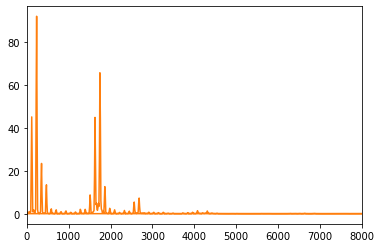

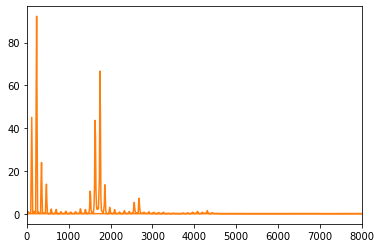

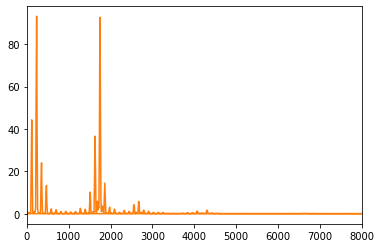

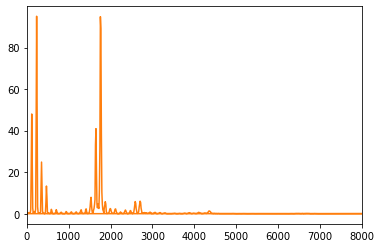

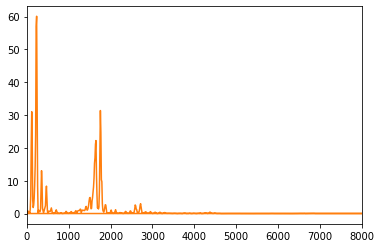

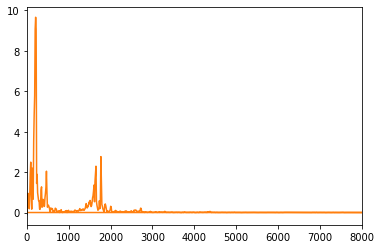

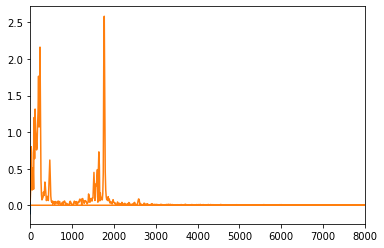

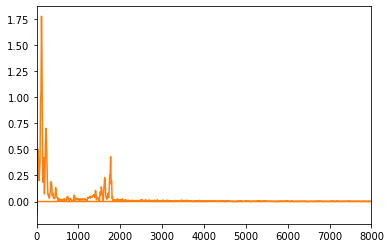

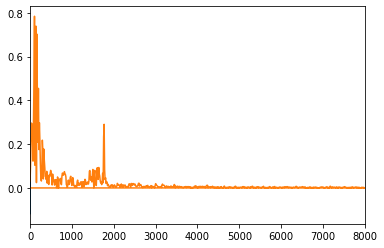

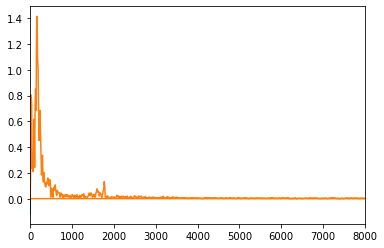

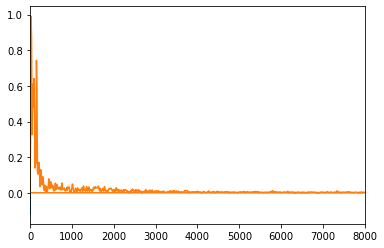

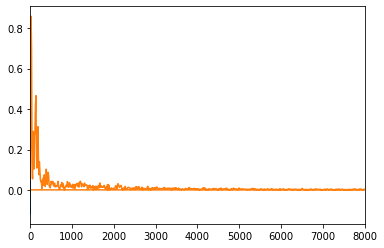

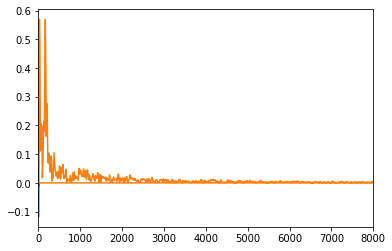

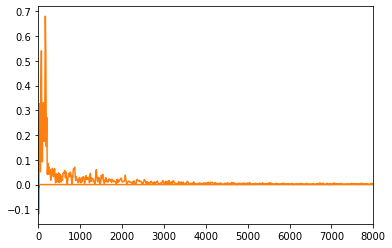

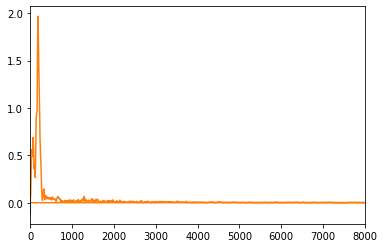

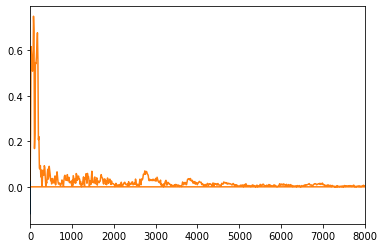

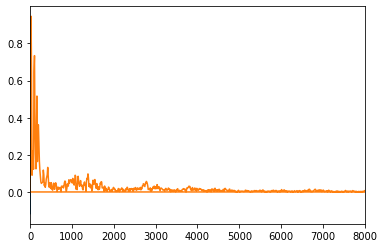

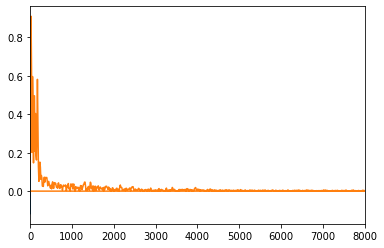

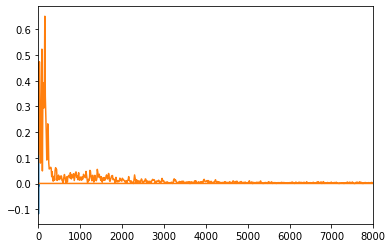

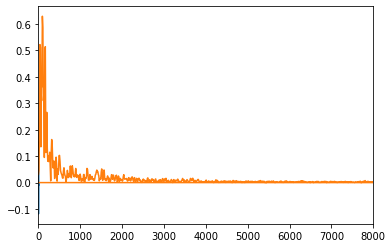

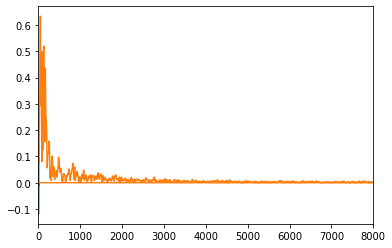

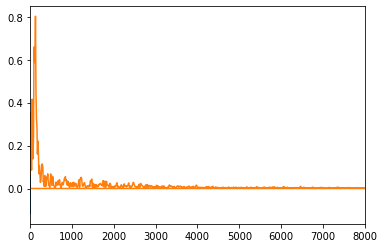

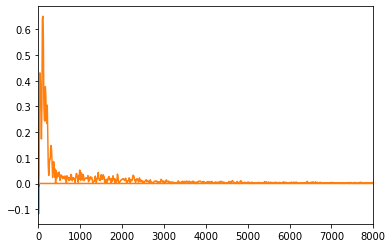

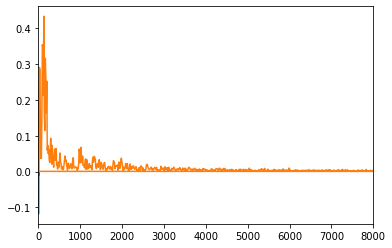

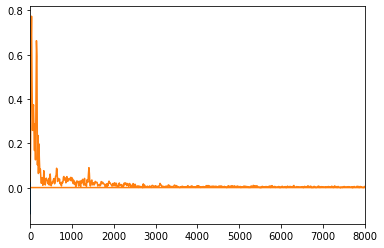

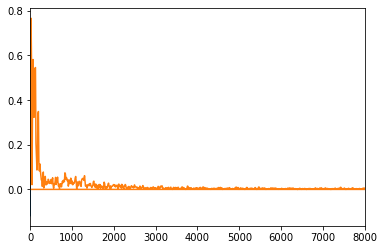

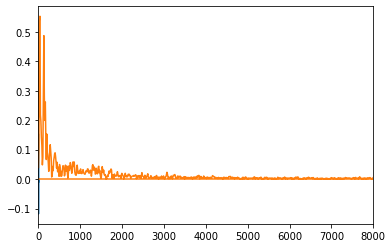

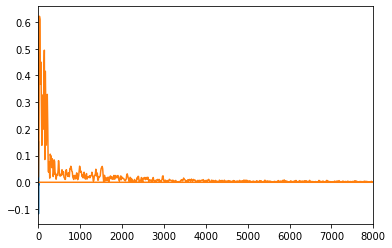

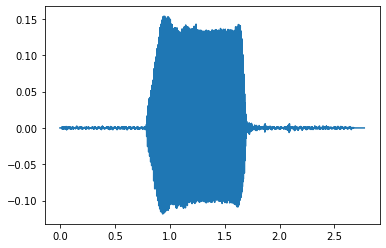

In [14]:
furie_transform()